<a href="https://colab.research.google.com/github/priyanshrupani/Car-Value-Predicting-Model/blob/main/Carprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Car price predictor**

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
df= pd.read_csv('/content/car details v4.csv')

In [173]:
df.head(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [174]:
print(df['Color'].value_counts())
print(df['Seller Type'].value_counts())
print(df['Engine'].value_counts())
print(df['Max Power'].value_counts())
print(df['Max Torque'].value_counts())


White     802
Silver    285
Grey      220
Blue      190
Black     163
Red       154
Brown      82
Maroon     37
Gold       30
Bronze     28
Green      17
Orange     16
Others     12
Yellow      9
Beige       8
Purple      5
Pink        1
Name: Color, dtype: int64
Individual                 1997
Corporate                    57
Commercial Registration       5
Name: Seller Type, dtype: int64
1197 cc    231
1248 cc    122
998 cc     121
1497 cc     84
1968 cc     82
          ... 
1948 cc      1
4806 cc      1
3496 cc      1
2609 cc      1
995 cc       1
Name: Engine, Length: 108, dtype: int64
89 bhp @ 4000 rpm     90
82 bhp @ 6000 rpm     62
83 bhp @ 6000 rpm     55
126 bhp @ 4000 rpm    55
74 bhp @ 4000 rpm     50
                      ..
204 bhp @ 3800 rpm     1
157 bhp @ 6500 rpm     1
255 bhp @ 3600 rpm     1
76 bhp @ 6000 rpm      1
329 bhp @ 5250 rpm     1
Name: Max Power, Length: 335, dtype: int64
200 Nm @ 1750 rpm    90
115 Nm @ 4000 rpm    78
114 Nm @ 4000 rpm    66
90 Nm @ 3500 

In [175]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [176]:
# to interpolate the missing values
df1=df.interpolate(method ='linear', limit_direction ='forward')
df1.fillna(0)


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [177]:
df1.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                  0
Width                   0
Height                  0
Seating Capacity        0
Fuel Tank Capacity      0
dtype: int64

In [178]:
X=df1.iloc[:,[0,1,2,3,4,5,6,9,10,15,16,17,18,19]]
X.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Owner,Seller Type,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,First,Corporate,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Second,Individual,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,First,Individual,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,First,Individual,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,First,Individual,4735.0,1830.0,1795.0,7.0,55.0


In [179]:
X.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Owner                 0
Seller Type           0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [180]:
print(X['Fuel Type'].value_counts())
print(X['Owner'].value_counts())
print(X['Transmission'].value_counts())
print(X['Seller Type'].value_counts())

Diesel          1049
Petrol           942
CNG               50
Electric           7
LPG                5
Hybrid             3
CNG + CNG          1
Petrol + CNG       1
Petrol + LPG       1
Name: Fuel Type, dtype: int64
First               1619
Second               373
Third                 42
UnRegistered Car      21
Fourth                 3
4 or More              1
Name: Owner, dtype: int64
Manual       1133
Automatic     926
Name: Transmission, dtype: int64
Individual                 1997
Corporate                    57
Commercial Registration       5
Name: Seller Type, dtype: int64


In [181]:
X.replace({'Fuel Type':{'Petrol':0,'Diesel':1,'CNG':2,'Electric':3,'LPG':4,'Hybrid':5,'CNG + CNG':6,'Petrol + CNG':7,'Petrol + LPG':8}},inplace=True)
X.replace({'Owner':{'First':0,'Second':1,'Third':2,'UnRegistered Car':3,'Fourth':4,'4 or More':5}},inplace=True)
X.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
X.replace({'Seller Type':{'Individual':0,'Corporate':1,'Commercial Registration':2}},inplace=True)

<ipython-input-181-040915e9a201>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace({'Fuel Type':{'Petrol':0,'Diesel':1,'CNG':2,'Electric':3,'LPG':4,'Hybrid':5,'CNG + CNG':6,'Petrol + CNG':7,'Petrol + LPG':8}},inplace=True)
<ipython-input-181-040915e9a201>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace({'Owner':{'First':0,'Second':1,'Third':2,'UnRegistered Car':3,'Fourth':4,'4 or More':5}},inplace=True)
<ipython-input-181-040915e9a201>:3: SettingWithCopyWarning: 
A value is trying to be 

In [182]:
X.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Owner,Seller Type,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,0,0,0,1,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,1,0,1,0,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,0,0,0,0,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,0,0,0,0,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,1,0,0,0,4735.0,1830.0,1795.0,7.0,55.0


In [183]:
a=X.iloc[:,[0,1]]
X=X.drop(['Make','Model'],axis=1)

In [184]:
a.head()

,Make,Model
0,Honda,Amaze 1.2 VX i-VTEC
1,Maruti Suzuki,Swift DZire VDI
2,Hyundai,i10 Magna 1.2 Kappa2
3,Toyota,Glanza G
4,Toyota,Innova 2.4 VX 7 STR [2016-2020]


In [185]:

Y=X.iloc[:,0]
X=X.drop(['Price'],axis=1)

In [186]:
X.head()

,Year,Kilometer,Fuel Type,Transmission,Owner,Seller Type,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,2017,87150,0,0,0,1,3990.0,1680.0,1505.0,5.0,35.0
1,2014,75000,1,0,1,0,3995.0,1695.0,1555.0,5.0,42.0
2,2011,67000,0,0,0,0,3585.0,1595.0,1550.0,5.0,35.0
3,2019,37500,0,0,0,0,3995.0,1745.0,1510.0,5.0,37.0
4,2018,69000,1,0,0,0,4735.0,1830.0,1795.0,7.0,55.0


In [187]:
Y.head()

0     505000
1     450000
2     220000
3     799000
4    1950000
Name: Price, dtype: int64

In [188]:
# Y is the target and X is the training data
# We have splitted the data and now we will perfrom linear regression on the data to predict
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [189]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [190]:
dd=LinearRegression()


In [191]:
dd.fit(X_train,Y_train)

LinearRegression()

In [192]:
traindata=dd.predict(X_train)

In [193]:
error=metrics.r2_score(Y_train,traindata)
error

0.5058376257527334

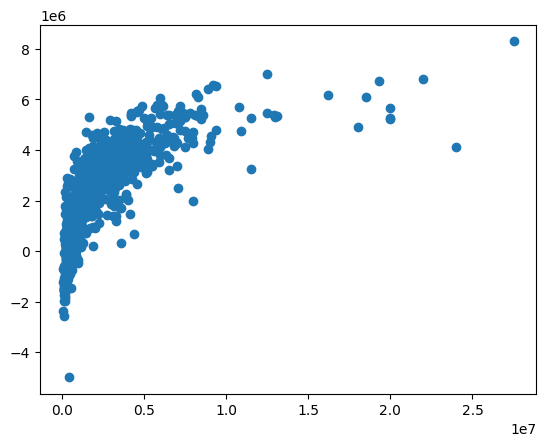

In [194]:
plt.scatter(Y_train,traindata)

In [195]:
testdata=dd.predict(X_test)
error1=metrics.r2_score(Y_test,testdata)

In [196]:
error1

0.4182589125823407

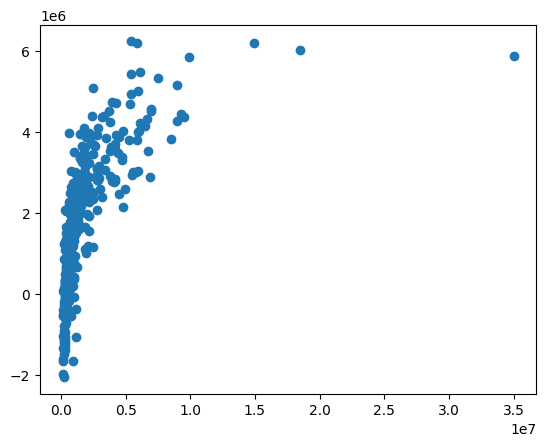

In [197]:
plt.scatter(Y_test,testdata)

In [198]:
from sklearn.linear_model import Lasso

In [199]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=62)

In [200]:
dl=Lasso()


In [201]:
dl.fit(X_train,Y_train)

Lasso()

In [202]:
traindata_lasso=dl.predict(X_train)

In [204]:
error=metrics.r2_score(Y_train,traindata_lasso)
error

0.4691885987620449

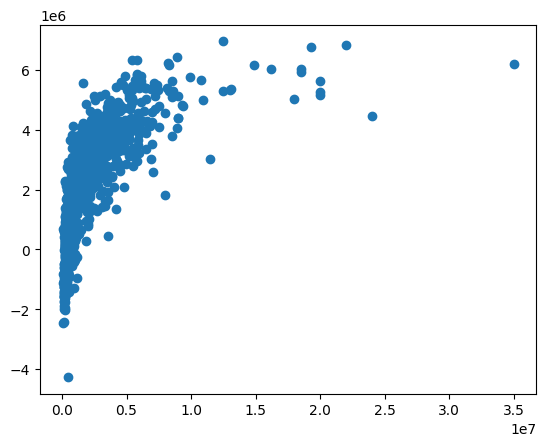

In [205]:
plt.scatter(Y_train,traindata_lasso)

In [206]:
testdata_lasso=dl.predict(X_test)
error1=metrics.r2_score(Y_test,testdata_lasso)

In [207]:
error1

0.5583838139508406

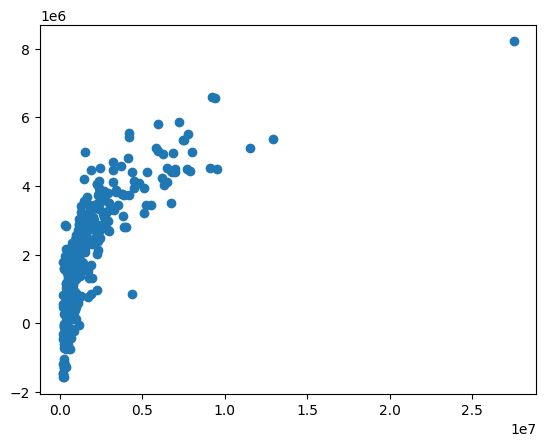

In [208]:
plt.scatter(Y_test,testdata_lasso)

In [243]:
from sklearn.linear_model import Ridge

In [250]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=43)

In [251]:
dr=Ridge()


In [252]:
dr.fit(X_train,Y_train)

Ridge()

In [253]:
traindata_ridge=dl.predict(X_train)

In [254]:
error=metrics.r2_score(Y_train,traindata_ridge)
error

0.4832996503368694

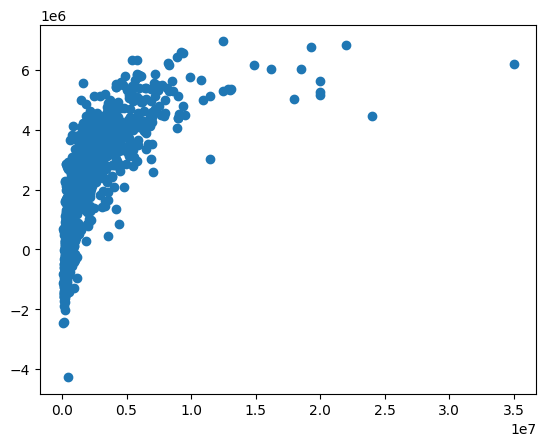

In [255]:
plt.scatter(Y_train,traindata_ridge)

In [256]:
testdata_ridge=dl.predict(X_test)
error2=metrics.r2_score(Y_test,testdata_ridge)

In [257]:
error2

0.4932269224826996

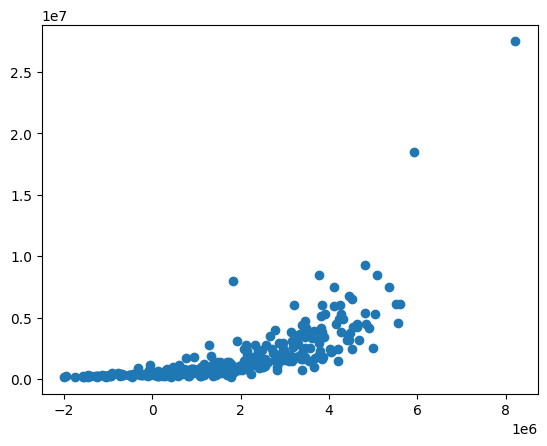

In [258]:
plt.scatter(testdata_ridge,Y_test)